In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_excel('Evenement 12 mois proo.xlsx')

In [4]:
df.head()

,Nom de l'événement,Nombre d'événements,Nombre total d'utilisateurs,Nombre d'événements par utilisateur
0,page_view,1152779,527808,2.194816
1,session_start,813490,522304,1.565861
2,user_engagement,647168,247780,2.623448
3,first_visit,531922,508946,1.045144
4,scroll,73753,52351,1.432431


In [5]:
df.tail()

,Nom de l'événement,Nombre d'événements,Nombre total d'utilisateurs,Nombre d'événements par utilisateur
11,Facebook,103,89,1.157303
12,LinkedIn,38,25,1.583333
13,Twitter,37,33,1.121212
14,Telegram,25,25,1.000000
15,file_download,5,5,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Nom de l'événement                   16 non-null     object 
 1   Nombre d'événements                  16 non-null     int64  
 2   Nombre total d'utilisateurs          16 non-null     int64  
 3   Nombre d'événements par utilisateur  16 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 644.0+ bytes


In [9]:
df.describe()

,Nombre d'événements,Nombre total d'utilisateurs,Nombre d'événements par utilisateur
count,1.600000e+01,16.000000,16.000000
mean,2.018427e+05,116639.562500,1.522775
std,3.693282e+05,209265.544197,0.486896
min,5.000000e+00,5.000000,1.000000
25%,8.675000e+01,75.000000,1.148281
50%,1.406500e+03,782.500000,1.423806
75%,1.882952e+05,101208.250000,1.694397
max,1.152779e+06,527808.000000,2.623448


In [11]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.corr()

,Nombre d'événements,Nombre total d'utilisateurs,Nombre d'événements par utilisateur
Nombre d'événements,1.000000,0.941594,0.467668
Nombre total d'utilisateurs,0.941594,1.000000,0.262879
Nombre d'événements par utilisateur,0.467668,0.262879,1.000000


<Axes: >

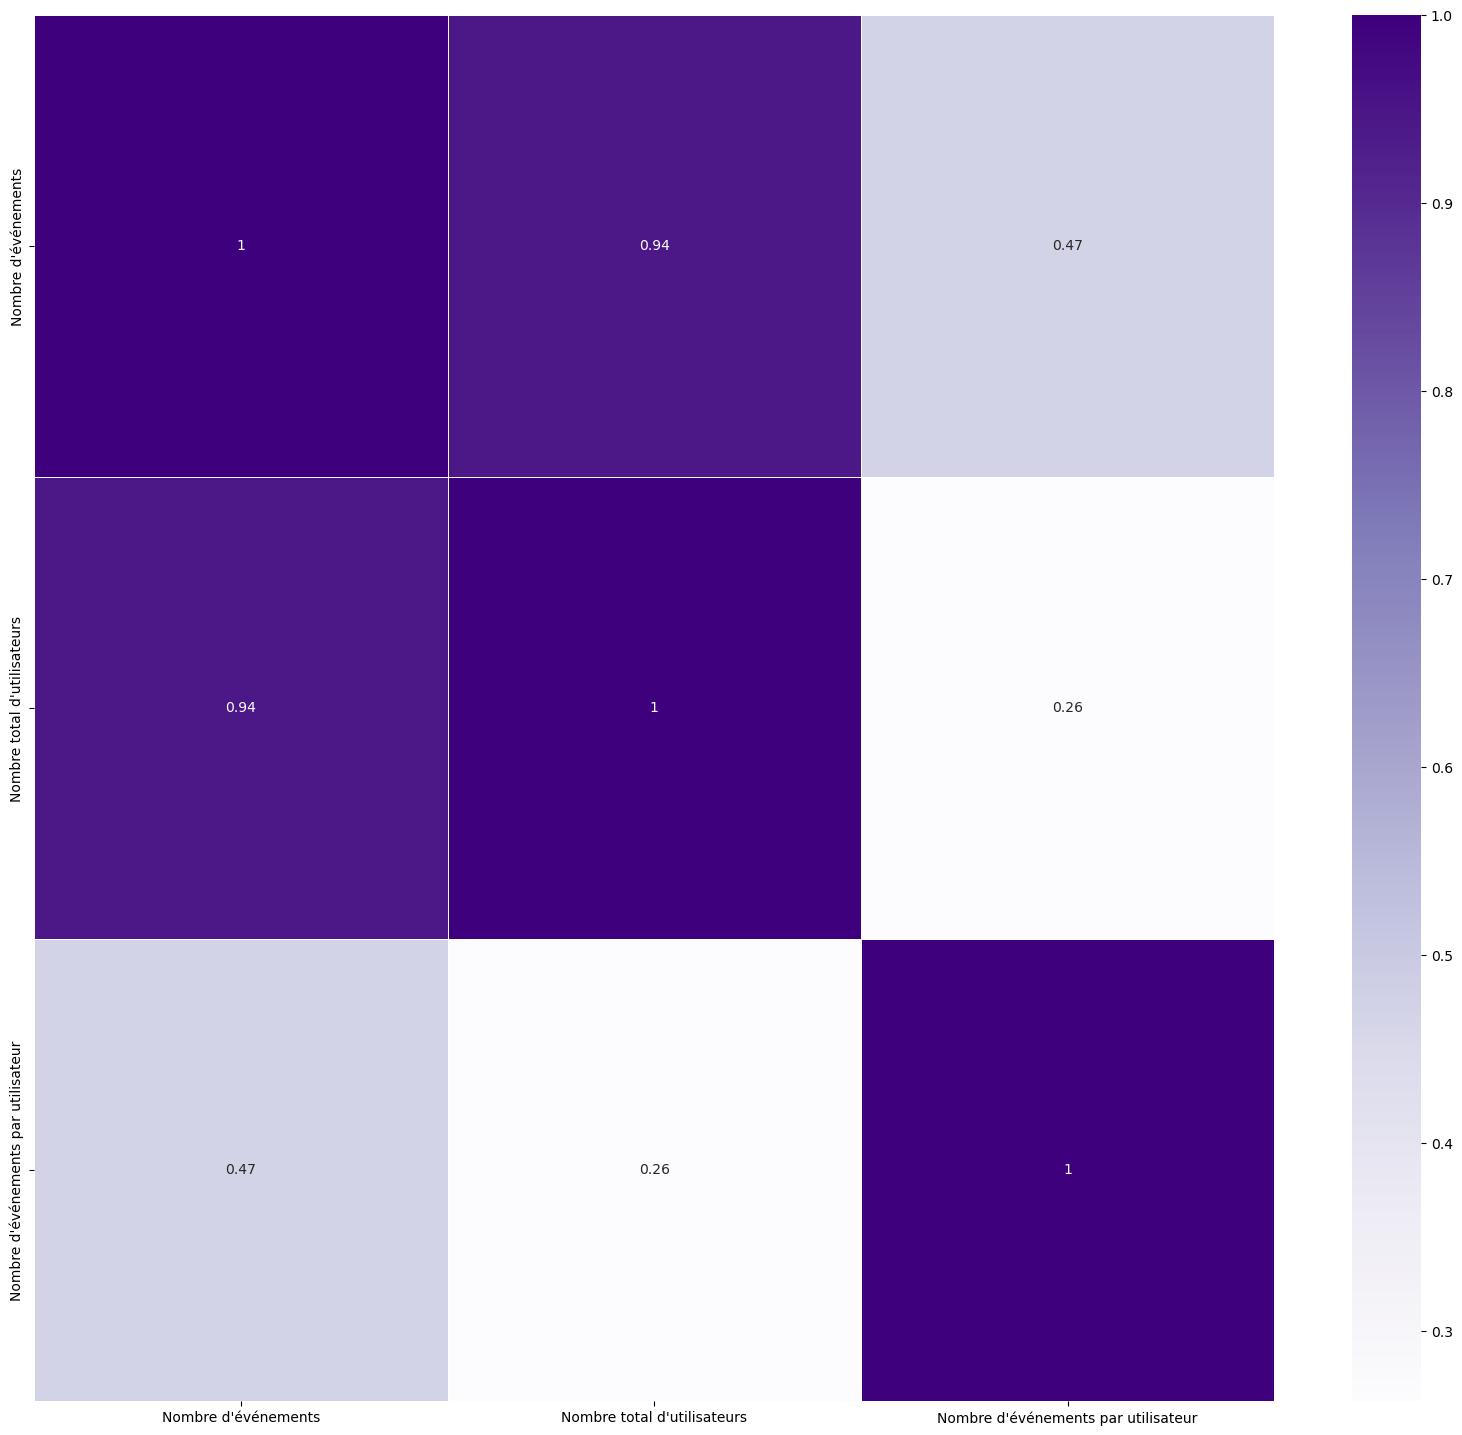

In [13]:
plt.figure(figsize=(20,18))
sns.heatmap(df_numeric.corr(), annot=True,linewidths=.5, cmap="Purples")

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


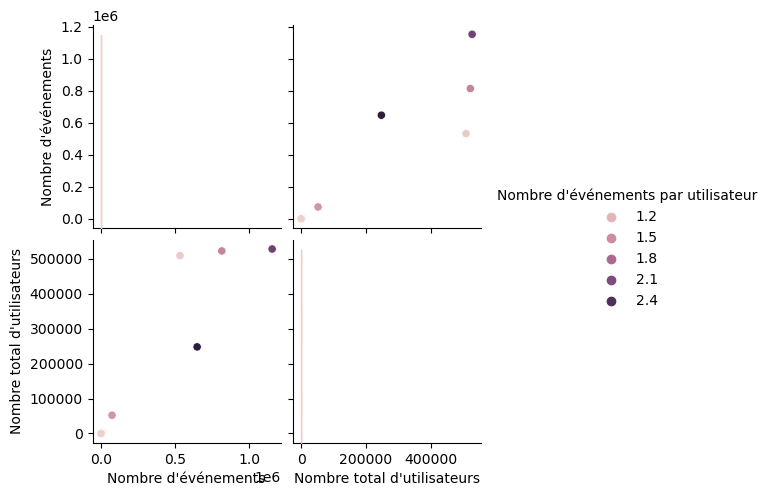

In [16]:
sns.pairplot(data=df_numeric, hue='Nombre d\'événements par utilisateur')
plt.show()

# visuliatipon

C:\Users\dell\AppData\Local\Temp\ipykernel_6920\2726333487.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Nom de l\'événement", y="Nombre d\'événements", data=df, estimator=sum, ci=None, palette='magma')


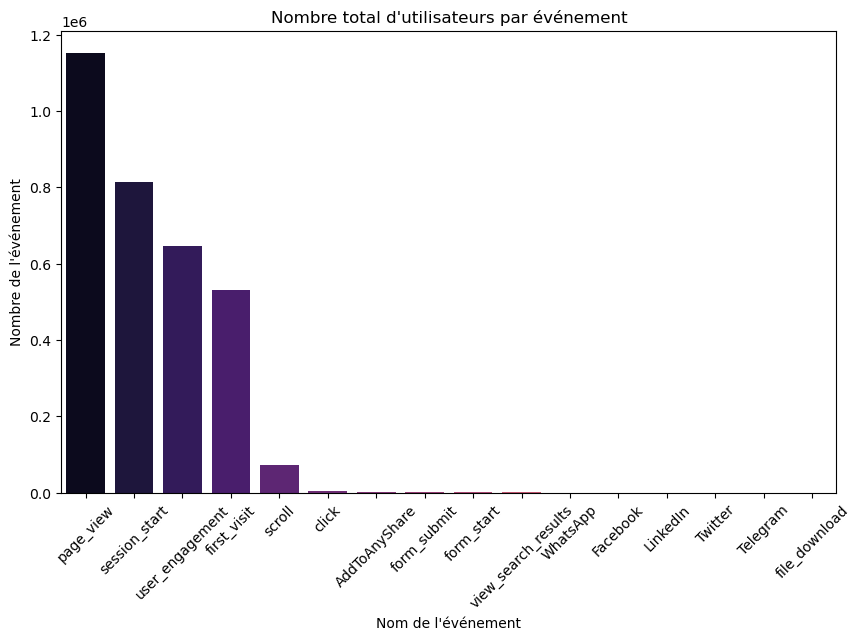

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Nom de l\'événement", y="Nombre d\'événements", data=df, estimator=sum, ci=None, palette='magma')
plt.title("Nombre total d'utilisateurs par événement")
plt.xlabel("Nom de l'événement")
plt.ylabel("Nombre de l'événement")
plt.xticks(rotation=45)  # تدوير العلامات على محور x لسهولة القراءة
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_6920\2578053574.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Nom de l\'événement", y="Nombre d\'événements par utilisateur", data=df, estimator=sum, ci=None, palette='magma')


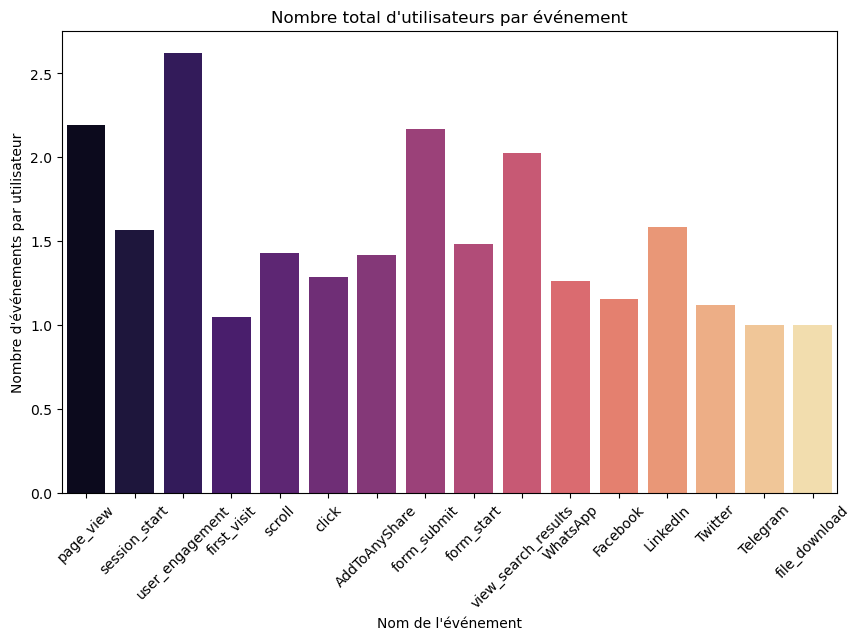

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Nom de l\'événement", y="Nombre d\'événements par utilisateur", data=df, estimator=sum, ci=None, palette='magma')
plt.title("Nombre total d'utilisateurs par événement")
plt.xlabel("Nom de l'événement")
plt.ylabel("Nombre d'événements par utilisateur")
plt.xticks(rotation=45)  # تدوير العلامات على محور x لسهولة القراءة
plt.show()

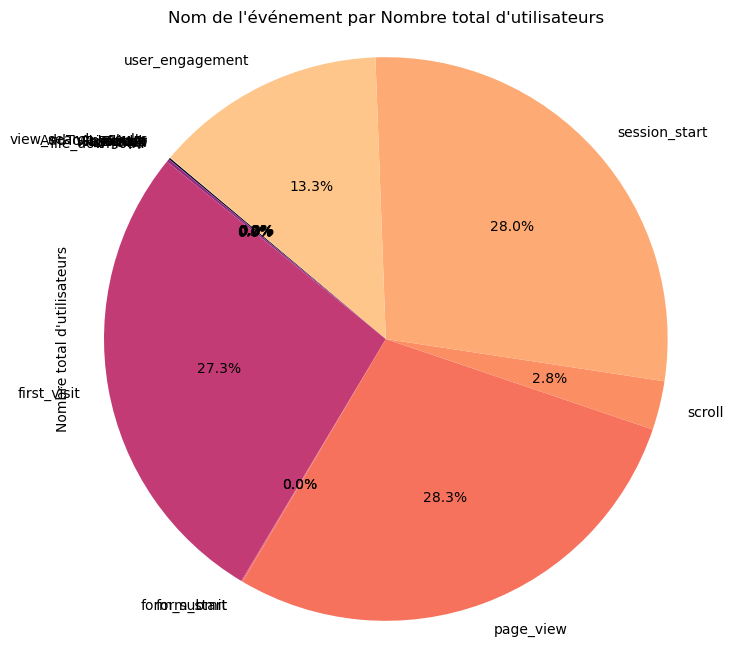

In [26]:
# مجمع البيانات باستخدام groupby
grouped_data = df.groupby('Nom de l\'événement')['Nombre total d\'utilisateurs'].sum()

# الآن يمكنك استخدام بيانات المجموع المجمعة في مخطط الدائرة
plt.figure(figsize=(8, 8))
grouped_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma', len(grouped_data)))
plt.title("Nom de l'événement par Nombre total d'utilisateurs")
plt.ylabel("Nombre total d'utilisateurs")
plt.axis('equal')
plt.show()
